In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic.csv')

In [5]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

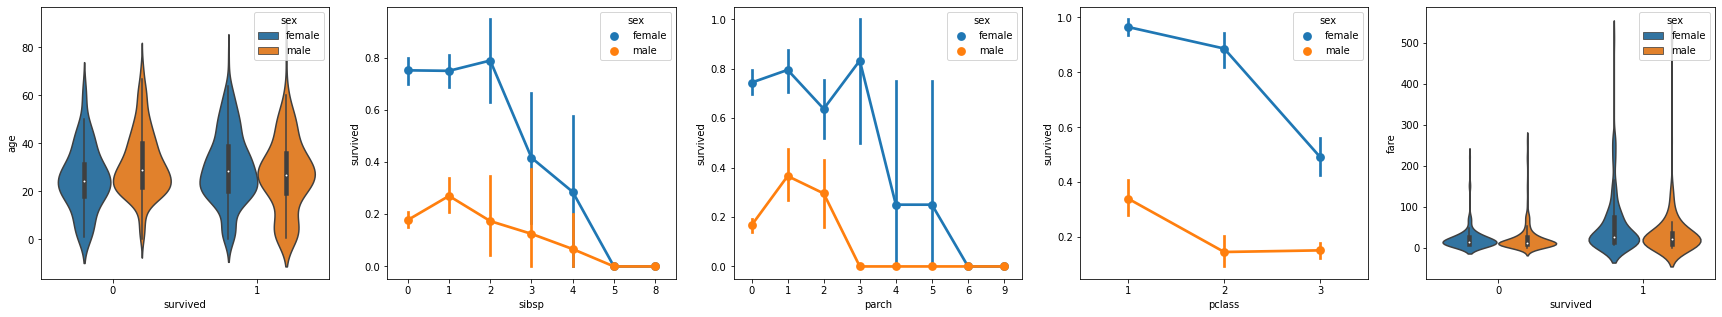

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [12]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [14]:
data["relatives"] = data.apply(lambda row: int(row["sibsp"] + row["parch"] > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [17]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(X_train, y_train)

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))



0.7464114832535885


In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(5, kernel_initializer="uniform", activation="relu", input_dim=5))
model.add(Dense(5, kernel_initializer="uniform", activation="relu"))
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 577us/step - loss: 0.5050 - accuracy: 0.8014
Epoch 2/50
27/27 [==============================] - 0s 616us/step - loss: 0.5035 - accuracy: 0.7990
Epoch 3/50
27/27 [==============================] - 0s 654us/step - loss: 0.5029 - accuracy: 0.8002
Epoch 4/50
27/27 [==============================] - 0s 577us/step - loss: 0.5017 - accuracy: 0.7967
Epoch 5/50
27/27 [==============================] - 0s 654us/step - loss: 0.5010 - accuracy: 0.7990
Epoch 6/50
27/27 [==============================] - 0s 692us/step - loss: 0.5002 - accuracy: 0.7978
Epoch 7/50
27/27 [==============================] - 0s 692us/step - loss: 0.4999 - accuracy: 0.7955
Epoch 8/50
27/27 [==============================] - 0s 692us/step - loss: 0.4988 - accuracy: 0.7967
Epoch 9/50
27/27 [==============================] - 0s 615us/step - loss: 0.4976 - accuracy: 0.7967
Epoch 10/50
27/27 [==============================] - 0s 577us/step - loss: 0.4970 - accuracy: 0.7967

In [33]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")
print(metrics.accuracy_score(y_test, y_pred))


0.8181818181818182
